## Callin Switzer
## Run simulations  for path

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import seaborn as sns
from scipy.integrate import odeint
import random
import time
from datetime import datetime
import sys
import pandas as pd
import multiProcTraj # note that this is a custom-written file 



# define directories
baseDir = os.getcwd()
dataDir = r'D:\MothSimulations\11c-AggressiveManeuver\Qstore\hws_am_con'
figDir = r'D:\Dropbox\AcademiaDropbox\mothMachineLearning_dataAndFigs\Figs'
dataOutput = r'D:\Dropbox\AcademiaDropbox\mothMachineLearning_dataAndFigs\DataOutput'
savedModels = r'D:\Dropbox\AcademiaDropbox\mothMachineLearning_dataAndFigs\savedModels'
randomRawData = r'D:/Dropbox/AcademiaDropbox/mothMachineLearning_dataAndFigs/PythonGeneratedData'

if not os.path.exists(dataOutput):
    os.mkdir(dataOutput)
if not os.path.exists(savedModels):
    os.mkdir(savedModels)

print(sys.version)
now = datetime.now()
print("last run on " + str(now))

3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
last run on 2019-01-01 22:27:31.008094


In [24]:
# Load data
pathDF = pd.read_csv(os.path.join(dataOutput, "PredictedTraj2.csv"))
pathDF.shape

(26, 28)

In [25]:
# remove first row (has NA)
pathDF.drop(pathDF.index[0], inplace = True)
print(pathDF.shape)
pathDF.head()


(25, 28)


,tsteps,signal,x_0,x_99,y_0,y_99,theta_0,theta_99,phi_0,phi_99,...,xd_99_actual,y_99_actual,yd_99_actual,theta_99_actual,thetad_99_actual,phi_99_actual,phid_99_actual,F_pred,alpha_pred,quadrant
1,0.02,2.486899,0.0,0.0,0.0,2.486899,0.785398,0.785398,3.926991,3.926991,...,0,0,0,0,0,0,0,14022.815479,1.174873,1
2,0.04,4.817537,0.0,0.0,0.0,2.330638,0.785398,0.785398,3.926991,3.926991,...,0,0,0,0,0,0,0,12486.833718,1.206250,1
3,0.06,6.845471,0.0,0.0,0.0,2.027934,0.785398,0.785398,3.926991,3.926991,...,0,0,0,0,0,0,0,10318.933887,1.265749,1
4,0.08,8.443279,0.0,0.0,0.0,1.597808,0.785398,0.785398,3.926991,3.926991,...,0,0,0,0,0,0,0,7705.878920,1.383812,1
5,0.10,9.510565,0.0,0.0,0.0,1.067286,0.785398,0.785398,3.926991,3.926991,...,0,0,0,0,0,0,0,5014.633491,1.661547,2


___

# Loop Version 

In [26]:
# put data into correct order
# x,xd,y,yd,
# theta,thetad,phi,phid, 
# F, alpha, tau0


tic = time.time()
t = np.linspace(0, 0.02, num = 100, endpoint = False) # time cut into 100 timesteps
nrun = pathDF.shape[0]  #number of trajectories.

# pre-allocate arrays to fill
nstep = 100
zeroMatrix = np.zeros([nrun, nstep])
x,      xd,    y,   yd, \
theta, thetad, phi, phid = [zeroMatrix.copy() for ii in 
                                range(len([ "x",     "xd",     "y", "yd", 
                                            "theta", "thetad", "phi", "phid"]))]

# generate  initial conditions for state 0
state01 = np.array(pathDF[["x_0", "x_dot_0", "y_0", "y_dot_0", 
           "theta_0", "theta_dot_0", "phi_0", "phi_dot_0", 
           "F_pred", "alpha_pred", "tau_pred"]])

# loop through all the runs
for i in range(0,nrun):
    # run ODE
    state = odeint(multiProcTraj.FlyTheBug, state01[i, :], t)
    x[i,:], xd[i,:] = state[:,0], state[:,1]
    y[i,:], yd[i, :] = state[:,2], state[:,3]
    theta[i,:], thetad[i, :] = state[:,4],state[:,5]
    phi[i,:], phid[i, :] = state[:, 6], state[:,7]
    
    if(np.mod(i, 1000) == 0):
        print(i)
        print('elapsed time = ',time.time()-tic)
print('elapsed time = ',time.time()-tic)

0
elapsed time =  0.02293848991394043
elapsed time =  0.41489315032958984


In [27]:
x.shape

(25, 100)

In [28]:
state01.shape

(25, 11)

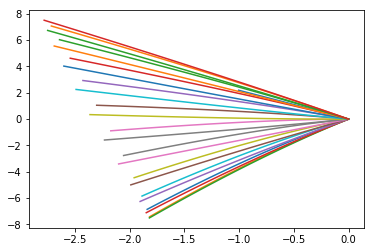

In [29]:
plt.figure()
for i in range(0,nrun):
    plt.plot(x[i, :],y[i, :], label = 'trajectory x vs y')

In [30]:
# get errors and correct with nnet

In [31]:
# get final states
x_f_sim = x[:, -1]
xd_f_sim = xd[:, -1]

y_f_sim = y[:, -1]
yd_f_sim = yd[:, -1]

theta_f_sim = theta[:, -1]
thetad_f_sim = thetad[:, -1]

phi_f_sim = phi[:, -1]
phid_f_sim = phid[:, -1]

In [32]:
pathDF["x_99_sim"] = x_f_sim
pathDF.head()

,tsteps,signal,x_0,x_99,y_0,y_99,theta_0,theta_99,phi_0,phi_99,...,y_99_actual,yd_99_actual,theta_99_actual,thetad_99_actual,phi_99_actual,phid_99_actual,F_pred,alpha_pred,quadrant,x_99_sim
1,0.02,2.486899,0.0,0.0,0.0,2.486899,0.785398,0.785398,3.926991,3.926991,...,0,0,0,0,0,0,14022.815479,1.174873,1,-1.004802
2,0.04,4.817537,0.0,0.0,0.0,2.330638,0.785398,0.785398,3.926991,3.926991,...,0,0,0,0,0,0,12486.833718,1.206250,1,-2.717447
3,0.06,6.845471,0.0,0.0,0.0,2.027934,0.785398,0.785398,3.926991,3.926991,...,0,0,0,0,0,0,10318.933887,1.265749,1,-2.642827
4,0.08,8.443279,0.0,0.0,0.0,1.597808,0.785398,0.785398,3.926991,3.926991,...,0,0,0,0,0,0,7705.878920,1.383812,1,-2.544642
5,0.10,9.510565,0.0,0.0,0.0,1.067286,0.785398,0.785398,3.926991,3.926991,...,0,0,0,0,0,0,5014.633491,1.661547,2,-2.428850


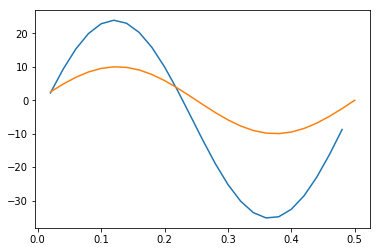

In [33]:
plt.plot(pathDF.tsteps, np.cumsum(y_f_sim))
plt.plot(pathDF.tsteps,pathDF.signal)

In [ ]:
combDF = testDF.head(100000).copy()

In [ ]:
combDF = combDF.assign(x_99_sim = x_f_sim, 
                      y_99_sim = y_f_sim, 
                      theta_99_sim = theta_f_sim, 
                      phi_99_sim = phi_f_sim, 
                      xd_99_sim = xd_f_sim, 
                      yd_99_sim = yd_f_sim, 
                      thetad_99_sim = thetad_f_sim, 
                      phid_99_sim = phid_f_sim) 

In [ ]:
combDF.head()

In [ ]:
combDF.to_csv(os.path.join(dataOutput, "SimVsNNet_Locations_100K.csv"), index = False)

___

# parallel version

The data is read in in multiProcTraj.py

In [ ]:
# put data into correct order
# x,xd,y,yd,
# theta,thetad,phi,phid, 
# F, alpha, tau0

nrun = 1000000

tic = time.time()
# loop through all the runs

p = Pool(cpu_count()-3)
stt = time.time()   
bb = p.map(multiProcTraj.flyBug_firstLast_test, range(nrun) ) 
print(time.time() -stt)

p.close()
p.join()
print(time.time() -stt)
newDF = pd.DataFrame(bb, columns= ["x0", "x_99_sim", "xd0", "xd_99_sim", "y0", "y_99_sim", "yd0", "yd_99_sim", "theta0", \
        "theta_99_sim", "thetad0", "thetad_99_sim", "phi0", "phi_99_sim", "phid0", "phid_99_sim", "F", "alpha", "tau0"])
print('elapsed time = ',time.time()-tic)

In [ ]:
print(newDF.shape)

newDF.head()

In [ ]:
# align newDF with old DF
testDF.head()

In [ ]:
combDF = newDF.merge(testDF.head(nrun), left_on=["F", "alpha", "tau0"], right_on=["F_pred", "alpha_pred", "tau_pred"])

In [ ]:
print(combDF.shape)
combDF.head()

In [ ]:
# save combined DF
combDF.to_csv(os.path.join(dataOutput, "SimVsNNet_Locations_Full.csv"), index = False)